
#  🏡House Rent Study of Metro Cities of India
**Cities:** Delhi, Mumbai, Chennai, Kolkata  
**Libraries Used:** NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn  
**Project Type:**  Data Science with ML (Regression)

*Submitted to MSIT as a Part of Summer Training Project made by Harshit Saxena 01815002723 CSE-1*

---


# Importing the Dependencies


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Collection and Processing

In [2]:
# Loading the data from house_rent_data csv file to Pandas DataFrame
df = pd.read_csv("house_rent_data.csv")
df



,City,Area (sqft),BHK,Bathroom,Furnishing Status,Tenant Preferred,Rent
0,Mumbai,2319,4,1,Semi-Furnished,Family,38074
1,Kolkata,505,3,2,Furnished,Family,18957
2,Kolkata,1401,2,3,Unfurnished,Company,18553
3,Mumbai,1027,3,3,Unfurnished,Company,28526
4,Mumbai,300,3,3,Furnished,Family,29177
...,...,...,...,...,...,...,...
99995,Kolkata,2924,1,1,Furnished,Bachelors,29462
99996,Mumbai,1506,2,2,Unfurnished,Family,28938
99997,Chennai,1201,1,3,Semi-Furnished,Family,24146
99998,Kolkata,1085,2,3,Furnished,Bachelors,22286


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis

In [4]:
# Displays summary information about the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   City               100000 non-null  object
 1   Area (sqft)        100000 non-null  int64 
 2   BHK                100000 non-null  int64 
 3   Bathroom           100000 non-null  int64 
 4   Furnishing Status  100000 non-null  object
 5   Tenant Preferred   100000 non-null  object
 6   Rent               100000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [5]:
# Displays the first 5 rows of the dataset
df.head()

,City,Area (sqft),BHK,Bathroom,Furnishing Status,Tenant Preferred,Rent
0,Mumbai,2319,4,1,Semi-Furnished,Family,38074
1,Kolkata,505,3,2,Furnished,Family,18957
2,Kolkata,1401,2,3,Unfurnished,Company,18553
3,Mumbai,1027,3,3,Unfurnished,Company,28526
4,Mumbai,300,3,3,Furnished,Family,29177


In [6]:
# Displays the last 5 rows of the dataset
df.tail()

,City,Area (sqft),BHK,Bathroom,Furnishing Status,Tenant Preferred,Rent
99995,Kolkata,2924,1,1,Furnished,Bachelors,29462
99996,Mumbai,1506,2,2,Unfurnished,Family,28938
99997,Chennai,1201,1,3,Semi-Furnished,Family,24146
99998,Kolkata,1085,2,3,Furnished,Bachelors,22286
99999,Delhi,1655,4,3,Unfurnished,Family,27129


In [7]:
# Returns the number of rows and columns in the dataset
df.shape

(100000, 7)

In [8]:
# Returns a list of all column names in the DataFrame
df.columns

Index(['City', 'Area (sqft)', 'BHK', 'Bathroom', 'Furnishing Status',
       'Tenant Preferred', 'Rent'],
      dtype='object')

In [9]:
# Displays summary statistics of numeric data
df.describe()

,Area (sqft),BHK,Bathroom,Rent
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1611.060280,2.463040,1.979820,26541.814290
std,779.096194,1.120405,0.823274,5561.549435
min,300.000000,1.000000,1.000000,11836.000000
25%,944.000000,1.000000,1.000000,22444.000000
50%,1596.000000,2.000000,2.000000,26461.000000
75%,2284.000000,3.000000,3.000000,30333.000000
max,3187.000000,4.000000,3.000000,45321.000000


# Data Cleaning and Preprocessing

In [10]:
# Step 1: Check for missing values
print("Missing values:")
print(df.isnull().sum()) 

Missing values:
City                 0
Area (sqft)          0
BHK                  0
Bathroom             0
Furnishing Status    0
Tenant Preferred     0
Rent                 0
dtype: int64


In [11]:
# Step 2: Check for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [12]:
# Step 3: Drop duplicate rows if any
df = df.drop_duplicates()
df

,City,Area (sqft),BHK,Bathroom,Furnishing Status,Tenant Preferred,Rent
0,Mumbai,2319,4,1,Semi-Furnished,Family,38074
1,Kolkata,505,3,2,Furnished,Family,18957
2,Kolkata,1401,2,3,Unfurnished,Company,18553
3,Mumbai,1027,3,3,Unfurnished,Company,28526
4,Mumbai,300,3,3,Furnished,Family,29177
...,...,...,...,...,...,...,...
99995,Kolkata,2924,1,1,Furnished,Bachelors,29462
99996,Mumbai,1506,2,2,Unfurnished,Family,28938
99997,Chennai,1201,1,3,Semi-Furnished,Family,24146
99998,Kolkata,1085,2,3,Furnished,Bachelors,22286


In [13]:
# Step 4: Check for missing values again using isna()
df.isna()

,City,Area (sqft),BHK,Bathroom,Furnishing Status,Tenant Preferred,Rent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False


In [59]:
# Step 5: Fill missing values in 'Rent' column with its mean value if any 
df["Rent"].fillna(df["Rent"].mean())
df["Area (sqft)"].fillna(df["Area (sqft)"].mean())

0        2319
1         505
2        1401
3        1027
4         300
         ... 
99995    2924
99996    1506
99997    1201
99998    1085
99999    1655
Name: Area (sqft), Length: 99974, dtype: int64

# City-wise Data Analysis 

In [15]:
# Fixed color mapping for cities
city_palette = {
    "Chennai": "#1f77b4",  # Blue
    "Delhi": "#FFA500",    # Mustard Yellow
    "Kolkata": "#2ca02c",  # Green
    "Mumbai": "#d62728"    # Red
}

city_bhk = {
    1: "#1f77b4",  # Blue
    2: "#FFA500",  # Mustard
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
}
# Fixed the order
customorder=["Chennai","Delhi","Kolkata","Mumbai"]
custombhk=[1,2,3,4]

In [16]:
# Counting the number of occurrences in the dataset

count_city = df['City'].value_counts()
print(count_city)

print(" ")

count_bhk = df['BHK'].value_counts()
print(count_bhk)

print(" ")

count_br = df['Bathroom'].value_counts()
print(count_br)

print(" ")

count_fs = df['Furnishing Status'].value_counts()
print(count_fs)

print(" ")

count_tp = df['Tenant Preferred'].value_counts()
print(count_tp)

City
Kolkata    28046
Delhi      25604
Chennai    23438
Mumbai     22886
Name: count, dtype: int64
 
BHK
2    27255
1    25583
4    24743
3    22393
Name: count, dtype: int64
 
Bathroom
1    34913
3    32887
2    32174
Name: count, dtype: int64
 
Furnishing Status
Furnished         35278
Unfurnished       33452
Semi-Furnished    31244
Name: count, dtype: int64
 
Tenant Preferred
Company      34182
Bachelors    33365
Family       32427
Name: count, dtype: int64


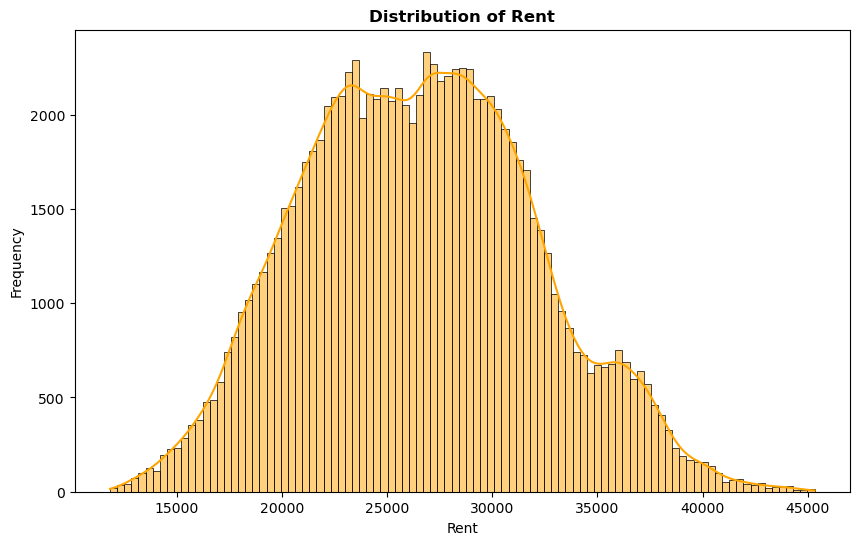

In [58]:
# Plotting the distribution of rent values using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Rent'], kde=True,color='orange')
plt.title('Distribution of Rent', weight='bold')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Calculate and display the mean (average) rent
mean = df["Rent"].mean()
print("The mean rent is :",round(mean,2))
print(" ")

# Calculate average rent for each city
avg1 = df.query("City=='Chennai'")["Rent"].mean()
avg2 = df.query("City=='Delhi'")["Rent"].mean()
avg3 = df.query("City=='Kolkata'")["Rent"].mean()
avg4 = df.query("City=='Mumbai'")["Rent"].mean()
print("The average rent in Chennai is :",round(avg1,2))
print("The average rent in Delhi is   :",round(avg2,2))
print("The average rent in Kolkata is :",round(avg3,2))
print("The average rent in Mumbai is  :",round(avg4,2))

The mean rent is : 26543.06
 
The average rent in Chennai is : 24725.96
The average rent in Delhi is   : 26623.26
The average rent in Kolkata is : 23429.11
The average rent in Mumbai is  : 32130.29


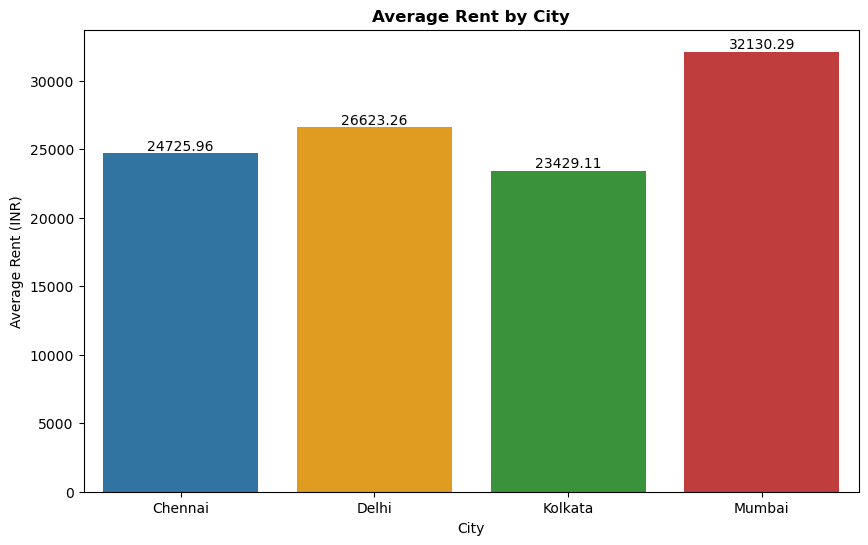

In [61]:
#Plotting Average Rent by City using a Line Plot with Labels

avg_rent = df.groupby('City')['Rent'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='City', y='Rent',order=customorder,data=avg_rent, hue='City',palette=city_palette )

# For getting the labels 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.title("Average Rent by City", weight='bold')
plt.xlabel("City")
plt.ylabel("Average Rent (INR)")
plt.show()

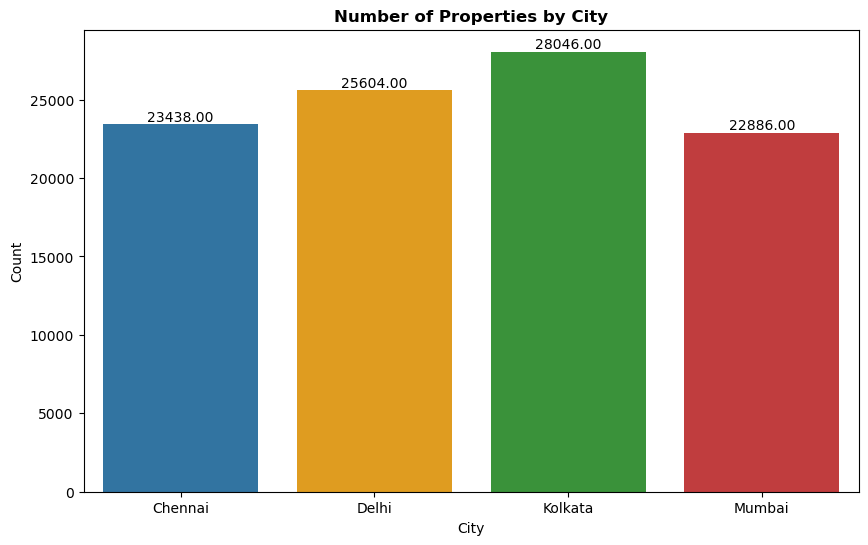

In [20]:
# Property Count by City
count_city = df['City'].value_counts()

plt.figure(figsize=(10, 6))

ax=sns.countplot(x='City', data=df, order=customorder,hue='City',palette=city_palette) 

# For getting the labels 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Number of Properties by City', weight='bold')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()


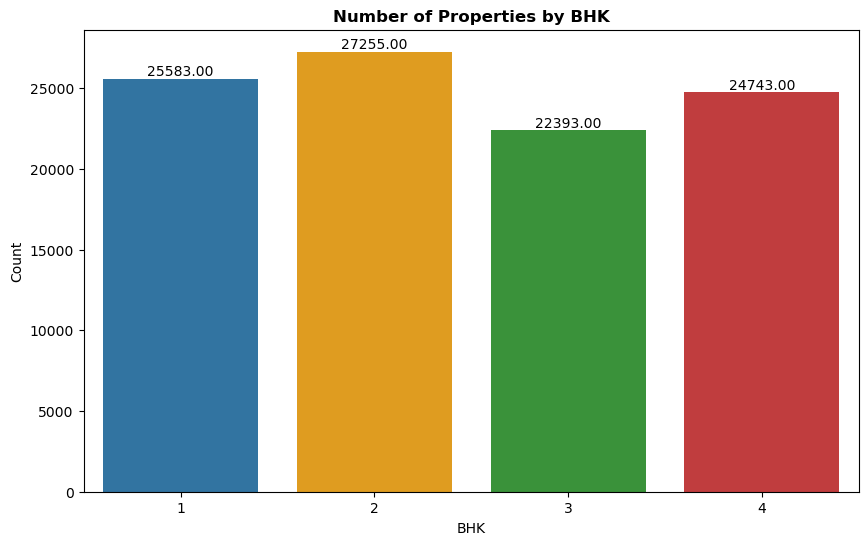

In [21]:
#Plotting Number of Properties by BHK using a Line Plot with Labels
count_bhk = df['BHK'].value_counts()

plt.figure(figsize=(10, 6))

ax= sns.countplot(x='BHK', data=df,hue='BHK',palette=city_bhk,order=city_bhk,legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.title('Number of Properties by BHK',weight='bold')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

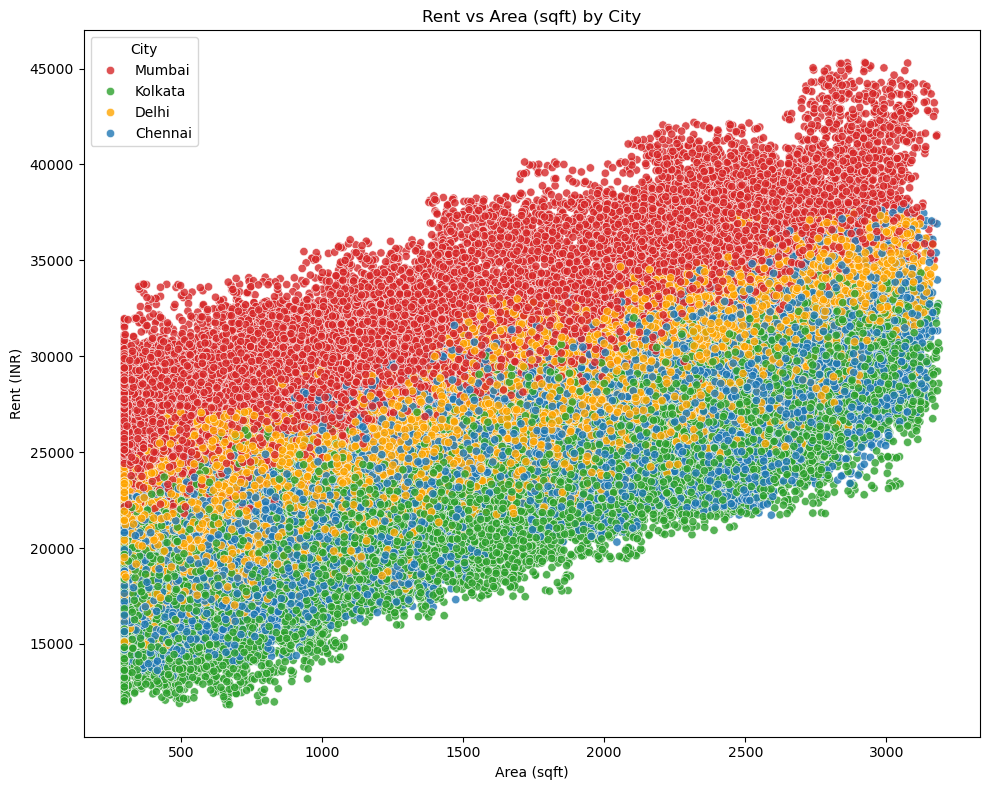

In [22]:
#sample_df= df.sample(50000, random_state=42) #If we want only sample data as 100000 is too much

plt.figure(figsize=(10, 8))
#sample_data=df.sample(10000,random_state=42)
sns.scatterplot(x='Area (sqft)', y='Rent', hue='City',palette=city_palette, data=df, alpha=0.8)
plt.title("Rent vs Area (sqft) by City")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent (INR)")
plt.tight_layout()
plt.show()



# Feature and Target Separation

In [23]:
X = df.drop("Rent",axis=1)
y = df["Rent"]
X = pd.get_dummies(X, drop_first=True)  # Converts non-numeric (categorical) columns into numeric dummy variables for training


# Model Training

## Linear Regression & Random Forest


In [24]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation

In [50]:
# Evaluation

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Linear Regression:
MSE: 2388231.9661299787
R² Score: 0.9228521450671516
Random Forest:
MSE: 1386328.418310929
R² Score: 0.9552169700339251


# Actual vs Predicted Rent Plot

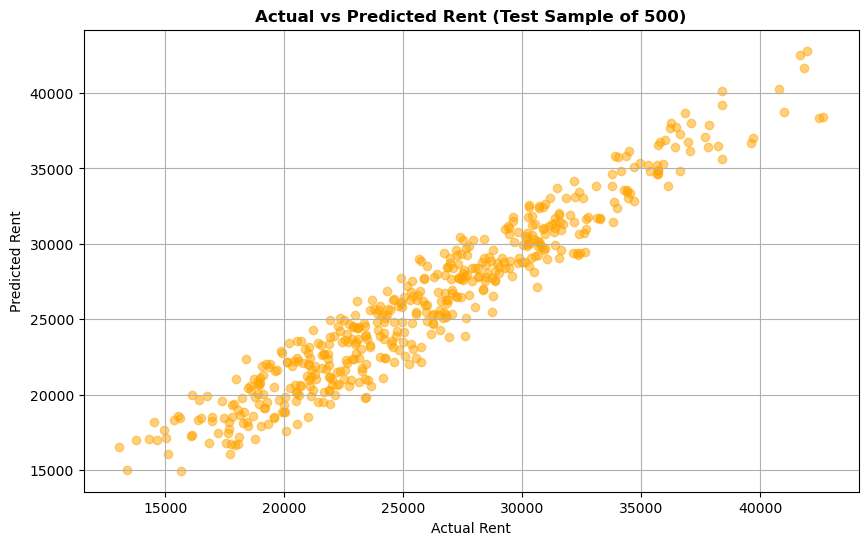

In [57]:
# Linear Regression
sample = np.random.choice(len(y_test), size=500, replace=False)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.iloc[sample], y_pred_lr[sample], alpha=0.5, color='orange')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent (Test Sample of 500)", weight='bold')
plt.grid(True)
plt.show()

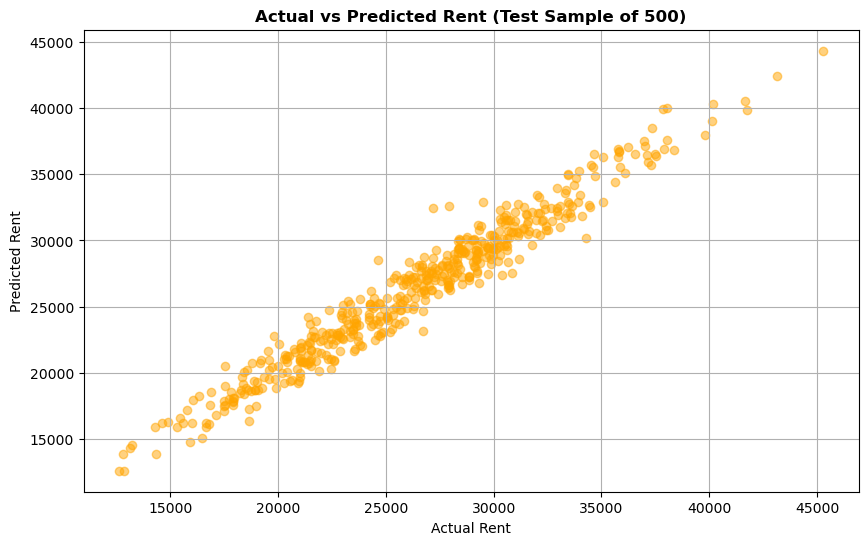

In [56]:
# Random Forest
sample = np.random.choice(len(y_test), size=500, replace=False)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.iloc[sample], y_pred_rf[sample], alpha=0.5, color='orange')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent (Test Sample of 500)", weight='bold')
plt.grid(True)
plt.show()

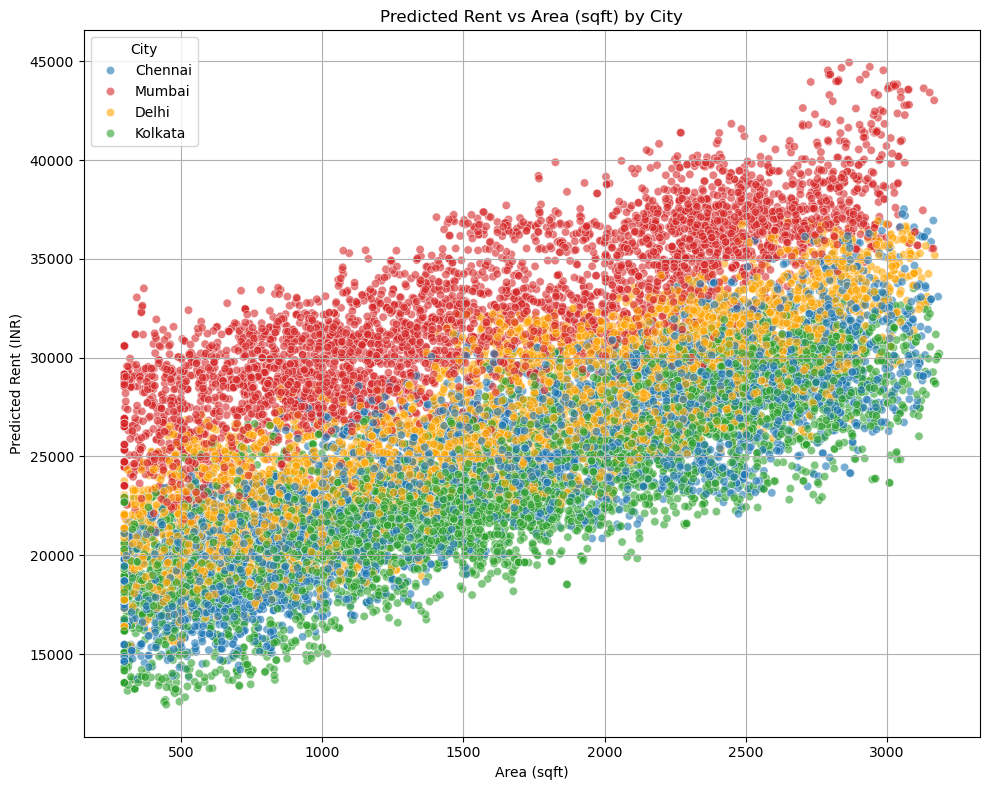

In [66]:
# Reset index to align with y_test
X_test_reset = X_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({
    "Predicted Rent": y_pred_rf,
    "Actual Rent": y_test.reset_index(drop=True)
})

# Assume you kept original unencoded df as df_original
area_test = df.loc[y_test.index, "Area (sqft)"].reset_index(drop=True)
city_test = df.loc[y_test.index, "City"].reset_index(drop=True)

# Combine all
y_pred_df["Area (sqft)"] = area_test
y_pred_df["City"] = city_test
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Area (sqft)', y='Predicted Rent', hue='City', data=y_pred_df, palette=city_palette, alpha=0.6)
plt.title("Predicted Rent vs Area (sqft) by City")
plt.xlabel("Area (sqft)")
plt.ylabel("Predicted Rent (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()



# Conclusion:
- The project successfully predicted house rent using both Linear Regression and Random Forest Regressor models.
- Among the cities analyzed, Mumbai and Delhi exhibited significantly higher average rents compared to other regions.
- Features like Area (sqft) and Furnishing Status were found to have a strong influence on the rent value.
- The model effectively captured current real estate trends and can provide valuable insights for future rent estimation and decision-making.

*The scores indicate that the models performed reliably, with Random Forest slightly outperforming Linear Regression.*